# Säljrapport

*Förslag på rapportstruktur*

## Introduktion

Här skriver vi en kort introduktion. 

In [ ]:
import matplotlib.pyplot as plt
from src.io_utils import *
from src.metrics import *
from src.viz import *

# Read
df = read_data("data/ecommerce_sales.csv")

# Clean
df_clean = clean_data(df)

print(df_clean.sample(3))

      order_id       date       city     category    price  units  revenue
1898    101898 2024-03-20  Stockholm         Toys    50.00      7   350.00
2161    102161 2024-04-21   Göteborg  Electronics  1573.22      3  4719.66
1316    101316 2024-02-03      Malmö       Beauty    65.10      4   260.40


c:\Users\Belson\Desktop\Gruppuppgift\src\metrics.py:53: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["revenue"].sum() / x["order_id"].nunique())
c:\Users\Belson\Desktop\Gruppuppgift\src\metrics.py:64: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["revenue"].sum() / x["order_id"].nunique())
c:\Users\Belson\Desktop\Gruppuppgift\src\metrics.py:73: FutureWarning: DataFrameGroupBy.ap

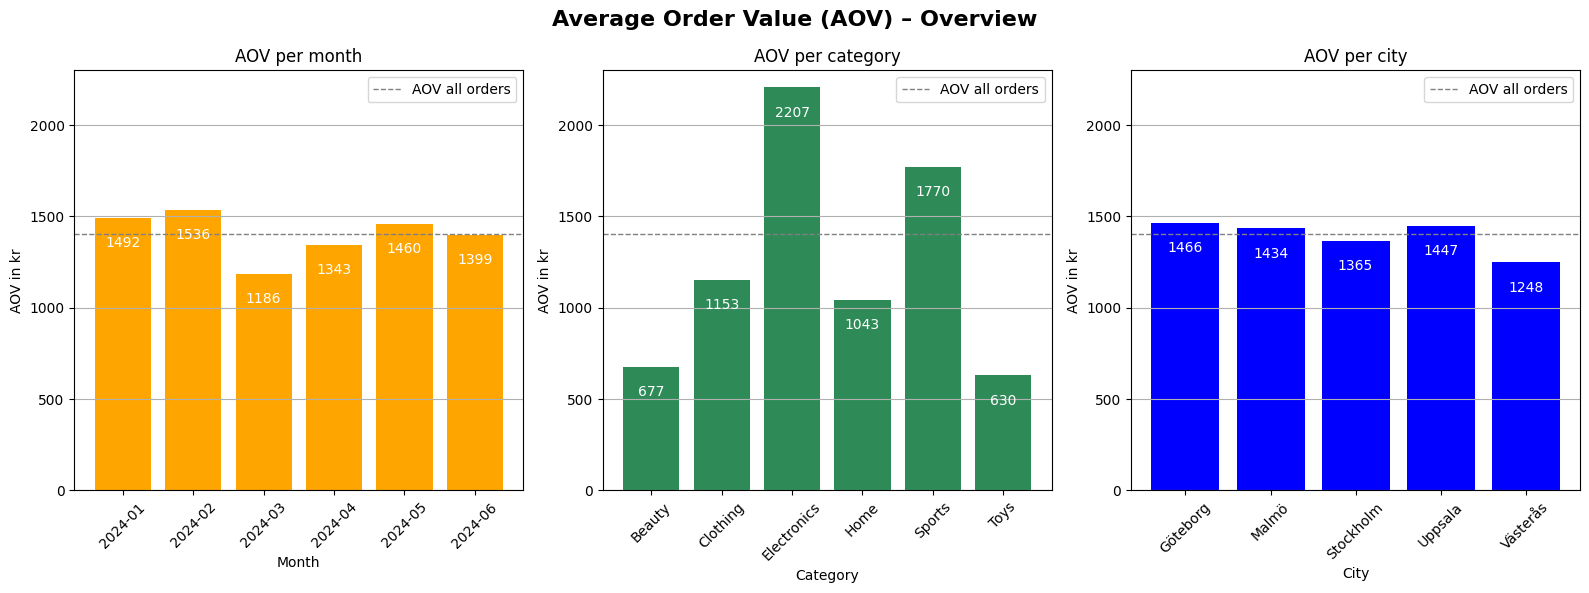

In [ ]:
# Calculating AOV data
monthly_aov, total_aov, category_aov, city_aov, ave_units_per_order = calculate_aov(df_clean)
print(ave_units_per_order)

# Plotting the AOV data
plot_aov_figure(monthly_aov, total_aov, category_aov, city_aov)

## Nyckeltal

Här visualiserar vi våra nyckeltal.

### 1. Vad säljer? – vilka kategorier driver mest intäkt?

**Nyckeltal:** Total intäkt och totalt antal enheter & Intäkt per kategori

### 2. Var säljer vi? – vilka städer står för störst intäkt?

**Nyckeltal:** Intäkt per stad 

In [ ]:
df_rev_city = revenue_per_city(df_clean)
print(f"The top 3 cities per revenue are:\n"
      f"{df_rev_city.head(3)}.")

fig, ax = plt.subplots(figsize=(7,5))
bar(ax, df_rev_city["city"], df_rev_city["tot_rev_city"], "Revenue per City", "City", "Revenue", color="#4682B4")

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?

 **Nyckeltal:** TBD

In [ ]:

from src.metrics  import  revenue_over_time

#revenue_over_time(df_clean)

ts_month = revenue_over_time(df_clean)
ts_month.head()



In [ ]:
from src.metrics import revenue_over_time, total_revenue
from src.viz import revenue_monthly_bar

# revenue_total = V.revenue_total(df_clean)
# revenue_by_month = V.revenue_by_month(df_clean),
# revenue_total, revenue_by_month

fig, ax = plt.subplots(figsize=(9,4))
#revenue_monthly_bar(ax, revenue_over_time["month"], total_revenue["revenue"], "Revenue by month", "Month", "Revenue")

### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.

**Nyckeltal:** AOV (Average Order Value)

### 5. Topp-listor – topp-3 kategorier efter intäkt.

**Nyckeltal:** Top-3 kategorier efter intäkt

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?

*Insikter om avvikelser som går att utläsa från sammanställning av datan ovan*

## Rekommendationer

Avsluta rapporten med 2–3 korta rekommendationer (punktlista) baserat på era resultat, t.ex. “Satsa på kategori X i stad Y under månad Z”.